In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/My Drive/Mestrado/2021.2/Aprendizagem de Maquina/trabalho_01/')

Mounted at /content/drive


# Imports

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
from src import metrics

# KNN

### Iris Dataset

In [ ]:
# g = sns.FacetGrid(d, hue="target")
# g = g.map(sns.histplot, "petal length (cm)")
# g.add_legend()

In [ ]:
def transform(x):
    if x == 'setosa':
        return 0
    elif x == 'virginica':
        return 1
    elif x == 'versicolor':
        return 2

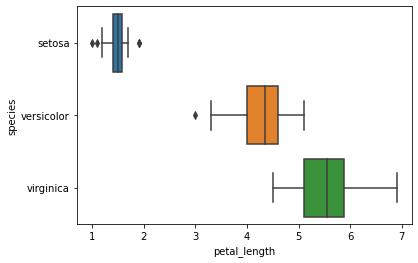

In [ ]:
df = sns.load_dataset('iris')
df['target'] = df['species'].apply(lambda x: transform(x))#1 if x == 'setosa' else x)


sns.boxplot( y=df["species"], x=df["petal_length"] )

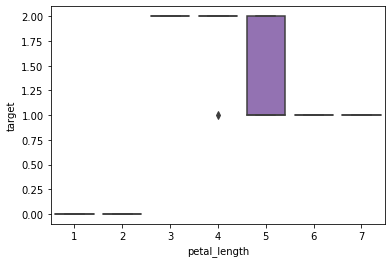

In [ ]:
df["petal_length"] = df["petal_length"].apply(lambda x: int(round(x)))
#df['target'] = df['species'].apply(lambda x: 'outras' if (x == 'virginica') or (x == 'versicolor') else x)


sns.boxplot( y=df["target"], x=df["petal_length"])

In [ ]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
#df['target'] = df['target'].apply(lambda x: 1 if x == 'setosa' else 0)
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
len_cols = len(np.arange(df['petal_length'].min(), df['petal_length'].max()+1, 1))
len_rows = len(df['target'].unique())

matrix = np.full((len_rows, len_cols), 0)
matrix

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [ ]:
map_value_idx = dict(zip(np.arange(df['petal_length'].min(), df['petal_length'].max() +1, 1), range(len_cols)))

In [ ]:
df['petal_length'].max()

7

In [ ]:
map_value_idx

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6}

In [ ]:
for x, i in zip(np.arange(df['petal_length'].min(), df['petal_length'].max()+1, 1), range(len_cols)):

    #matrix[0][i] = len(df.loc[(df['petal_length'] == x) & (df['target'] == 0)])
    #matrix[1][i] = len(df.loc[(df['petal_length'] == x) & (df['target'] == 1)])

    for y, j in zip(sorted(df['target'].unique()), range(len_rows)):
            matrix[j, i] = len(df.loc[(df['petal_length'] == x) & (df['target'] == y)])

In [ ]:
matrix

array([[24, 26,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 21, 24,  4],
       [ 0,  0,  3, 33, 14,  0,  0]])

In [ ]:
len(df.loc[(df['petal_length'] == 1) & (df['target'] == 1)])

0

In [ ]:
def sum_col(idx, matrix):
    return sum(matrix[:, idx])

In [ ]:
def predict(df, matrix, verbose=False):

    dict_priori = {}
    for j in df['target'].unique():
        dict_priori[j] = (len(df.loc[df['target'] == j]) / len(df))
    if verbose: print('priori: ', dict_priori)
    list_dict = []
    list_predict = []

    for idx, row in df.iterrows():
        if verbose:
            print('\n\n')
            print('petal_length:', row['petal_length'])
        xi = row['petal_length']
        i = map_value_idx[xi]
        dict_condicional = {}
        dict_cond_priori = {}
        for j in df['target'].unique():
            nij = matrix[j, i]
            ci = sum_col(i, matrix)
            prob_cond = nij / ci
            dict_condicional[j] = prob_cond
            if verbose:
                print(f'P(x|W{j}) = {nij}/{ci} = {prob_cond}')
            dict_cond_priori[j] = prob_cond * dict_priori[j]
        
        p_x = sum(dict_cond_priori.values())
        dict_posteriori = {}
        prob_max = -1
        class_target = -1
        for j in df['target'].unique():
            dict_posteriori[j] = dict_cond_priori[j] / p_x
            if prob_max < dict_posteriori[j]: 
                prob_max = dict_posteriori[j]
                class_target = j

        list_dict.append(dict_posteriori)
        list_predict.append(class_target)
        if verbose:
            print('posteriori: ', dict_posteriori)
            print('class: ', class_target)
    
    return list_predict, list_dict


In [ ]:
list_predict, list_dict = predict(df, matrix, verbose=True)

priori:  {0: 0.3333333333333333, 2: 0.3333333333333333, 1: 0.3333333333333333}



petal_length: 1
P(x|W0) = 24/24 = 1.0
P(x|W2) = 0/24 = 0.0
P(x|W1) = 0/24 = 0.0
posteriori:  {0: 1.0, 2: 0.0, 1: 0.0}
class:  0



petal_length: 1
P(x|W0) = 24/24 = 1.0
P(x|W2) = 0/24 = 0.0
P(x|W1) = 0/24 = 0.0
posteriori:  {0: 1.0, 2: 0.0, 1: 0.0}
class:  0



petal_length: 1
P(x|W0) = 24/24 = 1.0
P(x|W2) = 0/24 = 0.0
P(x|W1) = 0/24 = 0.0
posteriori:  {0: 1.0, 2: 0.0, 1: 0.0}
class:  0



petal_length: 2
P(x|W0) = 26/26 = 1.0
P(x|W2) = 0/26 = 0.0
P(x|W1) = 0/26 = 0.0
posteriori:  {0: 1.0, 2: 0.0, 1: 0.0}
class:  0



petal_length: 1
P(x|W0) = 24/24 = 1.0
P(x|W2) = 0/24 = 0.0
P(x|W1) = 0/24 = 0.0
posteriori:  {0: 1.0, 2: 0.0, 1: 0.0}
class:  0



petal_length: 2
P(x|W0) = 26/26 = 1.0
P(x|W2) = 0/26 = 0.0
P(x|W1) = 0/26 = 0.0
posteriori:  {0: 1.0, 2: 0.0, 1: 0.0}
class:  0



petal_length: 1
P(x|W0) = 24/24 = 1.0
P(x|W2) = 0/24 = 0.0
P(x|W1) = 0/24 = 0.0
posteriori:  {0: 1.0, 2: 0.0, 1: 0.0}
class:  0



p

In [ ]:
df['predict'] = list_predict

In [ ]:
metrics.accuracy(df['target'], df['predict'])

0.9

In [ ]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
df['predict'].value_counts()

1    63
0    50
2    37
Name: predict, dtype: int64

In [ ]:
list_dict

[{0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 {0: 1.0, 1: 0.0, 2: 0.0},
 